# Scraping for Saves

### MSP 4.16.2018



In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import matplotlib as mpl



In [4]:
# imports for scraping

from bs4 import BeautifulSoup
import requests




In [5]:
# 1: Name
# 2: Team
# 3: W
# 4: L
# 5: ERA
# 6:G
# 7: GS
# 8: CG
# 9: ShO
#10: SV
#11: HLD
#12: BS
#13: IP
#14: TBF
#15: H
#16: R
#17: ER
#18: HR
#19: BB
#20: IBB
#21: HBP
#22: WP
#23: BK
#24: SO

In [16]:
#0: SV
#1: IP
#2: HLD
#3: TBF
#4: SO
#5: BB

def scrape_saves(year='2018'):

    get_url = 'https://www.fangraphs.com/leaders.aspx?pos=all&stats=pit&lg=all&qual=0&type=0&season='+year+'&month=0&season1='+year+'&ind=0&team=0&rost=0&age=0&filter=&players=0&page=1_1000'
    r  = requests.get(get_url)

    data = r.text

    soup = BeautifulSoup(data)

    tables = soup.findAll('table')

    PDict = {}


    for row in tables[11].find_all("tr")[3:]: 
                #print(tnum)
                try:
                    #sav = [td.find('a') for td in row.find_all("td")][0]
                    sav = [td.get_text() for td in row.find_all("td")]
                    #print(sav)
                    PDict[sav[1]] = [float(sav[10]),float(sav[13]),float(sav[11]),float(sav[14]),float(sav[24]),float(sav[19])]
                except:
                    print('FAILED')

    return PDict



[0.0, 160.0, 0.5, 50.0]

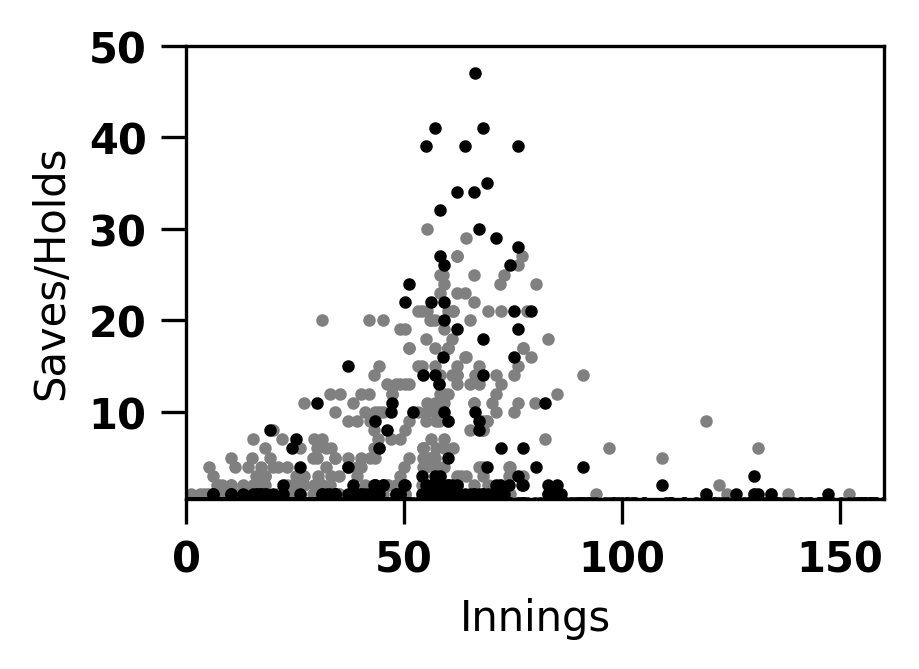

In [15]:
PDict = scrape_saves(year='2017')

plt.figure(figsize=(3,2))
plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,2],color='gray',s=4.)
plt.scatter(np.array(PDict.values())[:,1],np.array(PDict.values())[:,0],color='black',s=4.)

plt.xlabel('Innings')
plt.ylabel('Saves/Holds')
plt.axis([0.,160.,0.5,50.])

Tyler Chatwood       120  77   1
Yovani Gallardo       94  60   1
Mike Montgomery      100  55   3
Robert Stephenson     86  53   1
Hyun-Jin Ryu         116  45   1
Dellin Betances      100  44  10
Joe Biagini           97  42   1
Jose Leclerc          60  40   2
Corey Knebel         126  40  39
Kyle Barraclough      76  38   1
Justin Wilson         80  35  13
AJ Ramos              72  34  27
Shane Greene          73  34   9
Michael Lorenzen      80  34   2
Kenta Maeda          140  34   1
Carlos Torres         56  33   1
Jacob Barnes          80  33   2
Edwin Diaz            89  32  34
Ryan Tepera           81  31   2
Tyler Clippard        72  31   5
Erasmo Ramirez       109  31   1
Vance Worley          50  30   1
Sam Dyson             34  30  14
Hunter Strickland     58  29   1
Matt Barnes           83  28   1
Scott Alexander       59  28   4
Chris Stratton        51  28   1
Wade Davis            79  28  32
Matt Andriese         76  28   1
Joe Musgrove          98  28   2
Bud Norris

[0.0, 300.0, 0.5, 100.0]

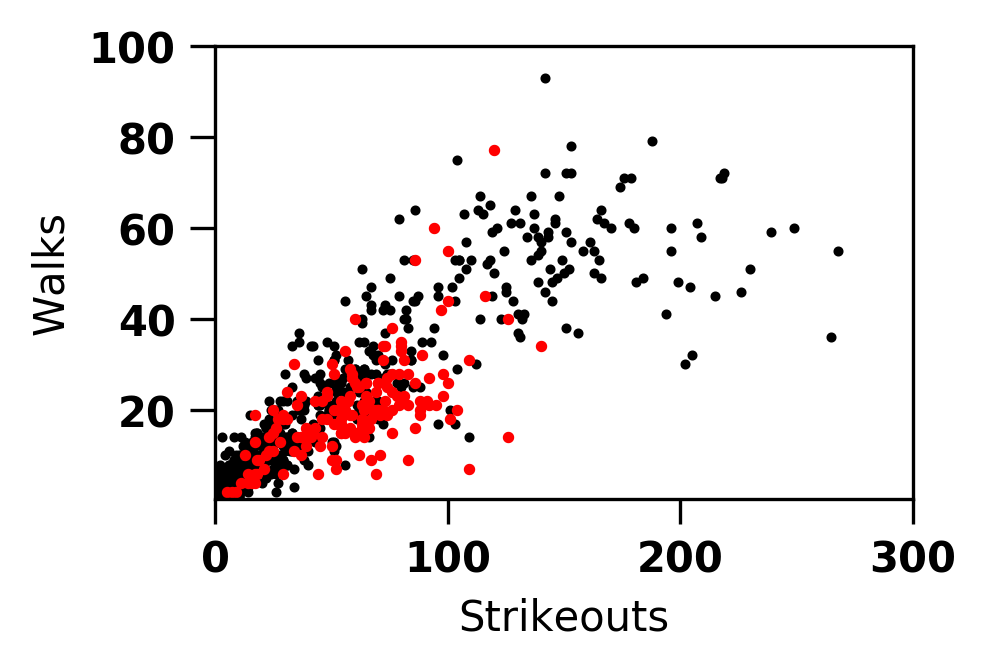

In [30]:
PDict = scrape_saves(year='2017')



plt.figure(figsize=(3,2))
#plt.scatter(np.array(PDict.values())[:,4],np.array(PDict.values())[:,5],color='gray',s=4.)
plt.scatter(np.array(PDict.values())[:,4],np.array(PDict.values())[:,5],color='black',s=2.)
plt.scatter(np.array(PDict.values())[(np.array(PDict.values())[:,0] > 0),4],np.array(PDict.values())[(np.array(PDict.values())[:,0] > 0),5],color='red',s=3.)

bborder = (-1.*np.array(PDict.values())[:,5]).argsort()

for ip in bborder:
    p = np.array(PDict.keys())[ip]
    if (np.array(PDict.values())[ip,0] > 0):
        print('{0:20s} {1:3d} {2:3d} {3:3d}'.format(p,int(np.array(PDict.values())[ip,4]),int(np.array(PDict.values())[ip,5]),int(np.array(PDict.values())[ip,0])))

plt.xlabel('Strikeouts')
plt.ylabel('Walks')
plt.axis([0.,300.,0.5,100.])

('2017', 89, 1179.0)
('2016', 85, 1276.0)
('2015', 83, 1292.0)
('2014', 79, 1264.0)
('2018', 48, 111.0)


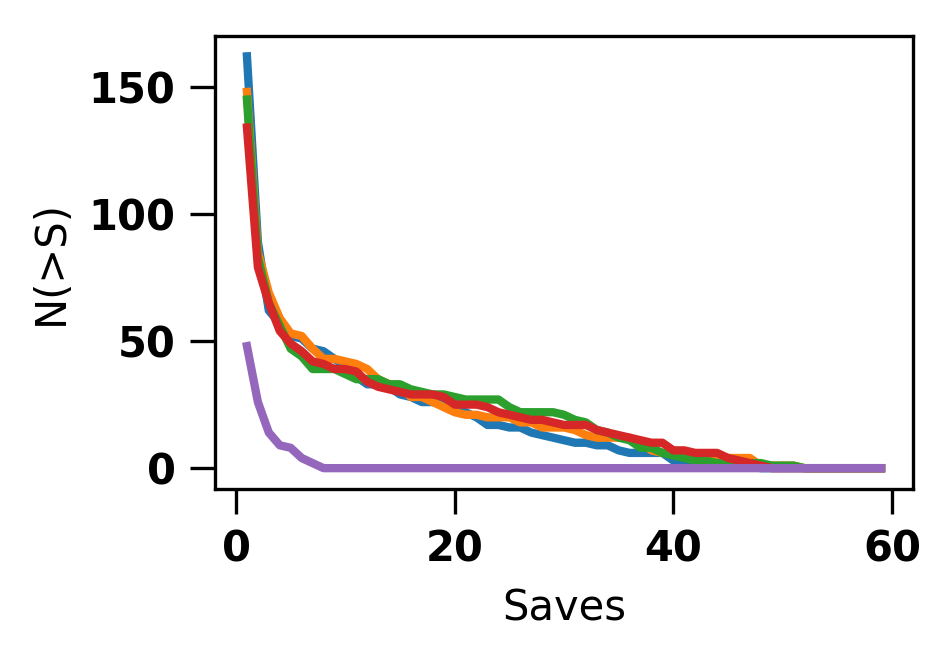

In [32]:

plt.figure(figsize=(3,2))

nsaves = np.arange(1,60,1)

PDict = scrape_saves(year='2017')
print('2017',len(np.where(np.array(PDict.values())[:,0] > 1.)[0]),np.sum(np.array(PDict.values())[:,0]))



nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)

PDict = scrape_saves(year='2016')
print('2016',len(np.where(np.array(PDict.values())[:,0] > 1.)[0]),np.sum(np.array(PDict.values())[:,0]))



nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)
    
    
PDict = scrape_saves(year='2015')
print('2015',len(np.where(np.array(PDict.values())[:,0] > 1.)[0]),np.sum(np.array(PDict.values())[:,0]))

nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)
    
    
PDict = scrape_saves(year='2014')
print('2014',len(np.where(np.array(PDict.values())[:,0] > 1.)[0]),np.sum(np.array(PDict.values())[:,0]))

nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)
    
PDict = scrape_saves(year='2018')
print('2018',len(np.where(np.array(PDict.values())[:,0] > 0.)[0]),np.sum(np.array(PDict.values())[:,0]))

nplayers = np.zeros_like(nsaves)

for indx,n in enumerate(nsaves):
    nplayers[indx] = len(np.where(np.array(PDict.values())[:,0] >= n)[0])
    
plt.plot(nsaves,nplayers)
    
        
    
    
plt.xlabel('Saves')
plt.ylabel('N(>S)')